# **[Data4life] Trending YouTube Analysis**

## **Import packages**

In [2]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

pd.options.display.float_format = '{:,.2f}'.format

## **Load datasets**

In [3]:
us_videos = pd.read_csv(filepath_or_buffer='./data/USvideos.csv', encoding='ISO-8859-1')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
with open(file='./data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

## **Clean data**

In [5]:
# Check the concise summary of the dataset
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

- Column `description` has missing values.
- Columns `trending_date` and `publish_time` should be converted to **datetime** type.

In [6]:
# Check the descriptive statistics of the dataset
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,949.00","40,949.00","40,949.00","40,949.00","40,949.00"
mean,19.97,"2,360,784.64","74,266.70","3,711.40","8,446.80"
std,7.57,"7,394,113.76","228,885.34","29,029.71","37,430.49"
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,"242,329.00","5,424.00",202.00,614.00
50%,24.00,"681,861.00","18,091.00",631.00,"1,856.00"
75%,25.00,"1,823,157.00","55,417.00","1,938.00","5,755.00"
max,43.00,"225,211,923.00","5,613,827.00","1,674,420.00","1,361,580.00"


Some videos receive a **significantly higher** number of views, likes, dislikes, or comments compared to **the majority** of other videos.

In [7]:
print(f'The number of duplicate rows: {us_videos.duplicated().sum()}')

The number of duplicate rows: 48


In [8]:
# Drop duplicate rows
us_videos.drop_duplicates(inplace=True, ignore_index=True)
print(f'The number of duplicate rows after cleaning: {us_videos.duplicated().sum()}')

The number of duplicate rows after cleaning: 0


In [9]:
print(f'The number of duplicate daily records for a video: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video: 2


In [10]:
# Drop duplicate daily records for a video
us_videos.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True, ignore_index=True)
print(f'The number of duplicate daily records for a video after cleaning: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video after cleaning: 0


In [11]:
# Convert column "trending_date" and "publish_time" to datetime type
us_videos['trending_date'] = pd.to_datetime(arg=us_videos['trending_date'], format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(arg=us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [12]:
# Check the final type of each column
us_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

In [13]:
# Create new column "category" based on the "category_id" column
us_videos['category'] = us_videos['category_id'].map(categories).str[0]
us_videos['category'].head()

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

## **General**

### **Question 1: What is the number of trending videos for each year?**

In [14]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,2119
1,2018,4427


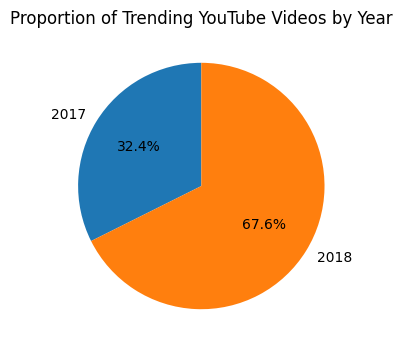

In [15]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().plot.pie(
    y='video_id', startangle=90, autopct='%1.1f%%', figsize=(5, 4)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

The number of trending videos in 2017 was significantly less than in 2018. Now, let's check the start and last dates in this dataset.

In [16]:
us_videos['trending_date'].min(), us_videos['trending_date'].max()

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In 2017, there are just 2 months (November to December), while in 2018, there are 6 months (January to June). Thus, the difference in quantity is normal.

### **Question 2: How many videos have disabled comments?**

In [17]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique()

comments_disabled
False    6251
True      107
Name: video_id, dtype: int64

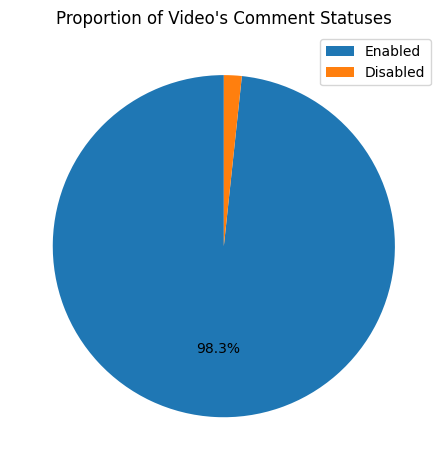

In [18]:
def autopct_func_90(pct):
    return f'{pct:.1f}%' if pct > 90 else ''

us_videos.groupby(by='comments_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Comment Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

Most videos have comments enabled.

### **Question 3: How many videos have disabled ratings?**

In [19]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique()

ratings_disabled
False    6327
True       32
Name: video_id, dtype: int64

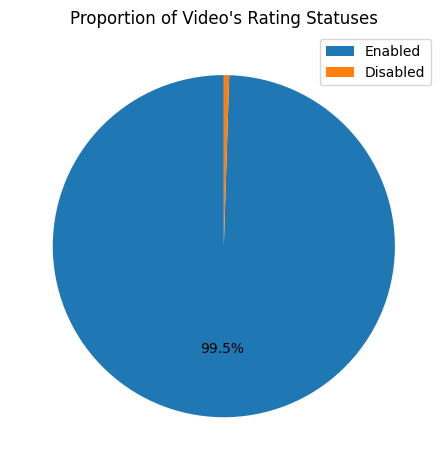

In [20]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Rating Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

Most videos have rating enabled.

### **Question 4: How many videos have errors or have been removed?**

In [21]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique()

video_error_or_removed
False    6348
True        4
Name: video_id, dtype: int64

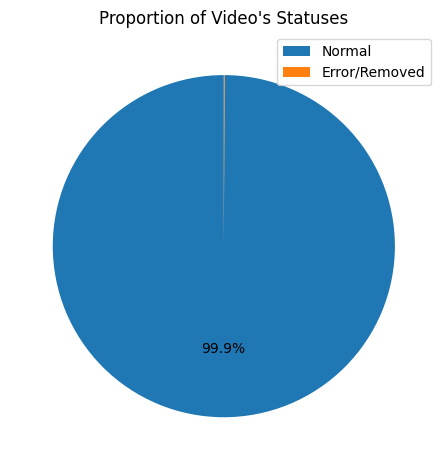

In [22]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Statuses")
plt.ylabel(ylabel='')
plt.legend(['Normal', 'Error/Removed'])
plt.tight_layout()
plt.show()

Only a small number of videos are removed or have errors.

## **Videos**

### **Question 5: How long does it take for videos to start trending?**

In [23]:
trending_time = us_videos.groupby(by='video_id', as_index=False).agg(func={'publish_time': 'first', 'trending_date': 'min'})
trending_time['days_to_trending'] = (trending_time['trending_date'] - trending_time['publish_time']).dt.days + 1
trending_time[trending_time['days_to_trending'] < 2]

,video_id,publish_time,trending_date,days_to_trending
3,-1yT-K3c6YI,2017-11-28 18:30:43,2017-11-29,1
6,-2b4qSoMnKE,2017-12-19 20:46:33,2017-12-20,1
7,-2wRFv-mScQ,2018-02-13 01:46:14,2018-02-14,1
8,-35jibKqbEo,2018-02-14 17:00:49,2018-02-15,1
10,-39ysKKpE7I,2018-04-23 15:37:08,2018-04-24,1
...,...,...,...,...
6338,zslYmBRhdOM,2017-12-07 19:15:06,2017-12-08,1
6340,ztLELdQDadE,2018-01-07 15:36:19,2018-01-08,1
6343,zuVxgSvyffk,2018-03-03 22:00:52,2018-03-04,1
6345,zvjqcoiOPbE,2018-01-05 05:00:03,2018-01-06,1


In [24]:
trending_time['days_to_trending_segment'] = np.where(
    trending_time['days_to_trending'] < 2, '<= 1 day', '>= 2 days'
)
trending_time['days_to_trending_segment'].value_counts()

days_to_trending_segment
>= 2 days    3496
<= 1 day     2855
Name: count, dtype: int64

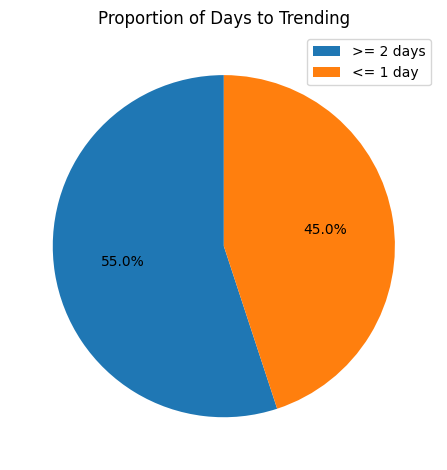

In [25]:
trending_time['days_to_trending_segment'].value_counts().plot.pie(labels=None, startangle=90, autopct='%1.1f%%')
plt.title(label="Proportion of Days to Trending")
plt.ylabel(ylabel='')
plt.legend(['>= 2 days', '<= 1 day'])
plt.tight_layout()
plt.show()

Nearly half of videos are trending within 1 day or less.

In [26]:
trending_time.merge(right=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max(), on='video_id')

,video_id,publish_time,trending_date_x,days_to_trending,days_to_trending_segment,trending_date_y
0,-0CMnp02rNY,2018-06-04 13:00:00,2018-06-06,2,>= 2 days,2018-06-11
1,-0NYY8cqdiQ,2018-01-29 14:00:39,2018-02-01,3,>= 2 days,2018-02-01
2,-1Hm41N0dUs,2018-04-27 07:30:02,2018-04-29,2,>= 2 days,2018-05-01
3,-1yT-K3c6YI,2017-11-28 18:30:43,2017-11-29,1,<= 1 day,2017-12-02
4,-2RVw2_QyxQ,2017-11-12 02:39:01,2017-11-14,2,>= 2 days,2017-11-16
...,...,...,...,...,...,...
6346,zwEn-ambXLw,2018-03-22 08:30:07,2018-03-26,4,>= 2 days,2018-04-06
6347,zxUwbflE1SY,2017-11-13 13:00:10,2017-11-15,2,>= 2 days,2017-11-19
6348,zxwfDlhJIpw,2018-05-01 15:57:06,2018-05-02,1,<= 1 day,2018-05-25
6349,zy0b9e40tK8,2017-11-09 09:00:07,2017-11-14,5,>= 2 days,2017-11-14


### **Question 6: What is the duration for which videos stay on the YouTube Trending Board?**

In [27]:
trending_duration = us_videos.groupby(by='video_id')['trending_date'].count().sort_values(ascending=False)
trending_duration

video_id
j4KvrAUjn6c    29
8h--kFui1JA    29
WIV3xNz8NoM    28
t4pRQ0jn23Q    28
QBL8IRJ5yHU    28
               ..
-8ZHXaGILlc     1
-9OfAHgdV8Y     1
-9rdDeWzvsU     1
zeQaJGkFyqQ     1
zkrq7Kpd1so     1
Name: trending_date, Length: 6351, dtype: int64

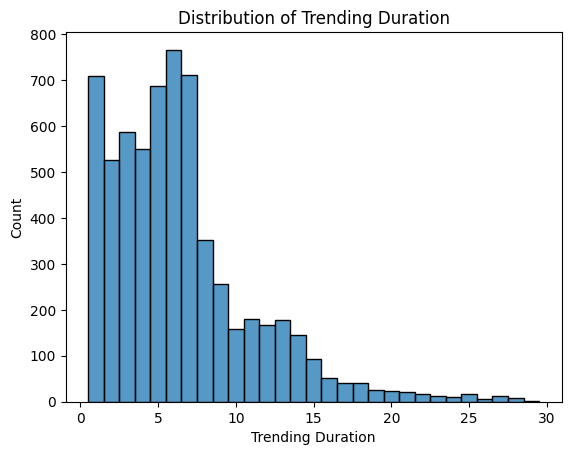

In [28]:
sns.histplot(data=trending_duration, discrete=True)
plt.title(label='Distribution of Trending Duration')
plt.xlabel(xlabel='Trending Duration')
plt.show()

Most videos remain on the YouTube Trending Board for under 10 days.

## **Channels**

### **Question 7: What is the number of channels?**

In [29]:
print(f'The number of channels: {us_videos['channel_title'].nunique()}')

The number of channels: 2207


### **Question 8: Which channels feature the highest number of trending videos?**

In [30]:
videos_by_channel = us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False)

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
The Late Show with Stephen Colbert        58
                                          ..
nothorwitzer                               1
nickjonas                                  1
neilyoungchannel                           1
negermano                                  1
ARIKITCHEN (ìë¦¬í¤ì¹)                  1
Name: video_id, Length: 2207, dtype: int64

In [31]:
print(f'The tenth largest number of trending videos for a channel: {np.unique(ar=videos_by_channel)[-10]}')

The tenth largest number of trending videos for a channel: 40


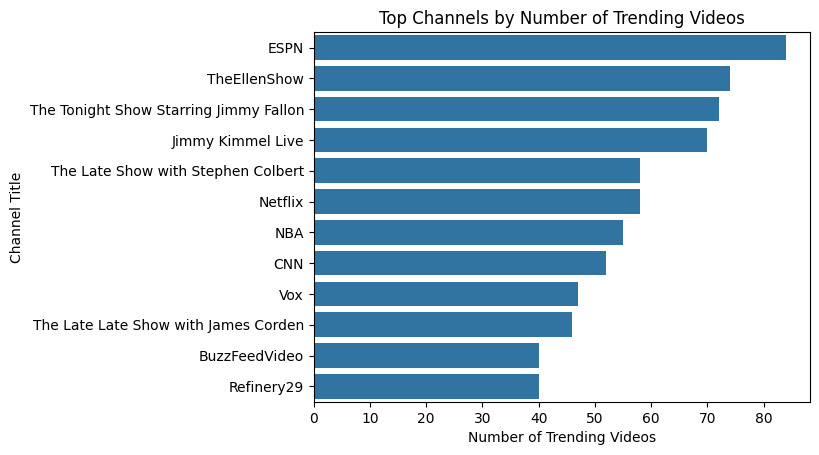

In [32]:
sns.barplot(data=videos_by_channel[videos_by_channel >= 40], orient='h')
plt.title(label='Top Channels by Number of Trending Videos')
plt.xlabel(xlabel='Number of Trending Videos')
plt.ylabel(ylabel='Channel Title')
plt.show()

### **Question 9: Which channels have the highest number of published categories?**

In [33]:
categories_by_channel = us_videos.groupby(by='channel_title', as_index=False)['category'].nunique().sort_values(by='category', ascending=False)
categories_by_channel

,channel_title,category
807,INSIDER,7
1935,ViralHog,7
1265,National Geographic,6
1713,Teen Vogue,5
1950,WIRED,5
...,...,...
26,ABC7,1
27,AFP news agency,1
28,AIA awards,1
29,ALL URBAN CENTRAL,1


In [34]:
categories_by_channel['category_segment'] = np.where(
    categories_by_channel['category'] == 1, '1', '2 -> 7'
)
categories_by_channel['category_segment'].value_counts()

category_segment
1         2098
2 -> 7     109
Name: count, dtype: int64

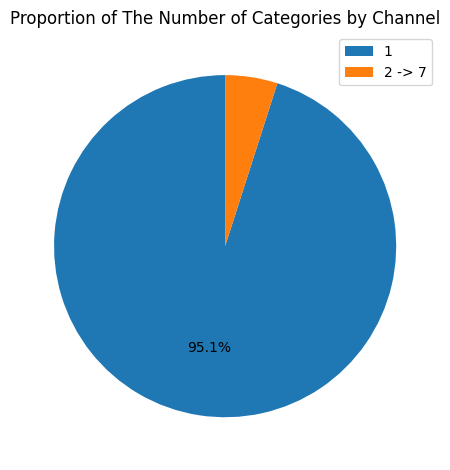

In [35]:
categories_by_channel['category_segment'].value_counts().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label='Proportion of The Number of Categories by Channel')
plt.ylabel(ylabel='')
plt.legend(['1', '2 -> 7'])
plt.tight_layout()
plt.show()

Only a few channels are capable of making trending videos across different categories.

### **Question 10: Which channels receive the most average views, likes, dislikes, and comments?**

In [36]:
latest_trending_date = us_videos.groupby(by='video_id', as_index=False)['trending_date'].max()
latest_trending_date = latest_trending_date.merge(right=us_videos, on=['video_id', 'trending_date'])
latest_trending_date.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,-0CMnp02rNY,2018-06-11,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,423,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,Entertainment
1,-0NYY8cqdiQ,2018-02-01,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,24,2018-01-29 14:00:39,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,94,https://i.ytimg.com/vi/-0NYY8cqdiQ/default.jpg,False,False,False,Ellen and Megan Mullally have known each other...,Entertainment
2,-1Hm41N0dUs,2018-05-01,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23,2018-04-27 07:30:02,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,1484,https://i.ytimg.com/vi/-1Hm41N0dUs/default.jpg,False,False,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",Comedy
3,-1yT-K3c6YI,2017-12-02,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,22,2017-11-28 18:30:43,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",231341,7734,212,846,https://i.ytimg.com/vi/-1yT-K3c6YI/default.jpg,False,False,False,Check out the video we did on the Merrell Twin...,People & Blogs
4,-2RVw2_QyxQ,2017-11-16,2017 Champions Showdown: Day 3,Saint Louis Chess Club,27,2017-11-12 02:39:01,"Chess|""Saint Louis""|""Club""",71089,460,27,20,https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg,False,False,False,The Saint Louis Chess Club hosts a series of f...,Education


#### **Views**

In [37]:
views_by_channel = latest_trending_date.groupby(by='channel_title')['views'].mean().sort_values(ascending=False).head(n=10)

channel_title
ChildishGambinoVEVO   225,211,923.00
BeckyGVEVO            139,334,502.00
TheWeekndVEVO         122,544,931.00
LuisFonsiVEVO         102,012,605.00
MalumaVEVO             73,570,842.00
DrakeVEVO              60,635,812.00
Kylie Jenner           56,111,957.00
Cardi B                55,897,560.00
Selena Gomez           54,863,912.00
ArianaGrandeVevo       50,911,589.67
Name: views, dtype: float64

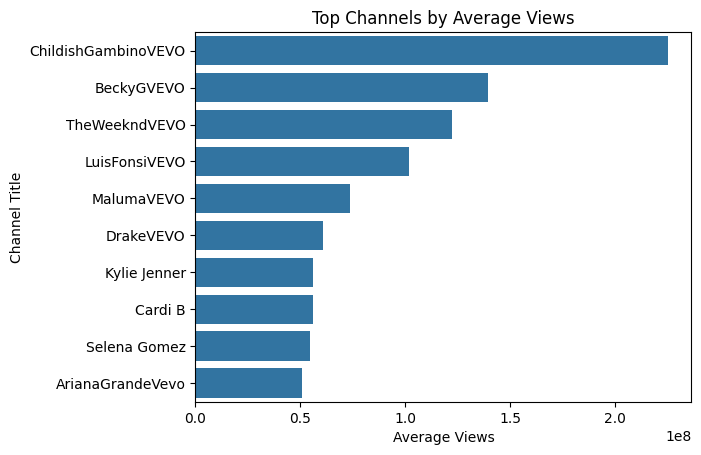

In [38]:
sns.barplot(data=views_by_channel, orient='h')
plt.title(label='Top Channels by Average Views')
plt.xlabel(xlabel='Average Views')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Likes**

In [39]:
likes_by_channel = latest_trending_date.groupby(by='channel_title')['likes'].mean().sort_values(ascending=False).head(n=10)

channel_title
ChildishGambinoVEVO   5,023,450.00
ibighit               2,438,628.22
LuisFonsiVEVO         2,376,636.00
David Dobrik          2,032,463.00
TheWeekndVEVO         1,427,436.00
BeckyGVEVO            1,425,496.00
Logan Paul Vlogs      1,405,268.75
Desimpedidos          1,121,217.00
Cardi B               1,098,608.50
ArianaGrandeVevo      1,097,980.33
Name: likes, dtype: float64

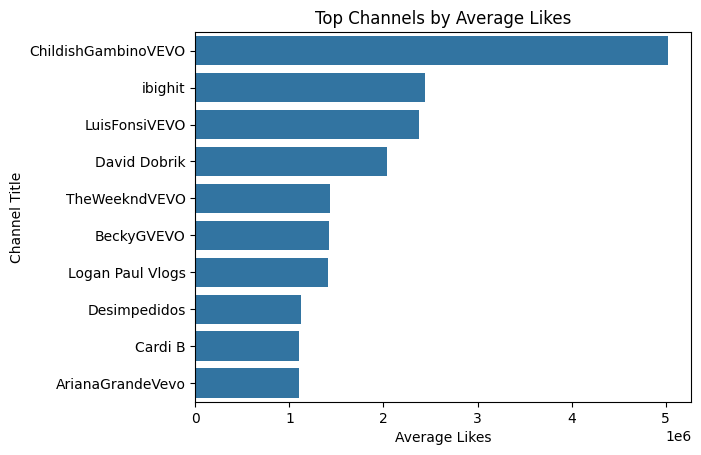

In [40]:
sns.barplot(data=likes_by_channel, orient='h')
plt.title(label='Top Channels by Average Likes')
plt.xlabel(xlabel='Average Likes')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Dislikes**

In [41]:
dislikes_by_channel = latest_trending_date.groupby(by='channel_title')['dislikes'].mean().sort_values(ascending=False).head(n=10)

channel_title
Logan Paul Vlogs      651,109.50
YouTube Spotlight     590,677.33
ChildishGambinoVEVO   343,541.00
Daily Caller          228,426.00
shakiraVEVO           124,281.00
Call of Duty          122,546.50
BeckyGVEVO            119,798.00
LuisFonsiVEVO         117,196.00
Erika Costell         104,831.00
David Dobrik          101,678.00
Name: dislikes, dtype: float64

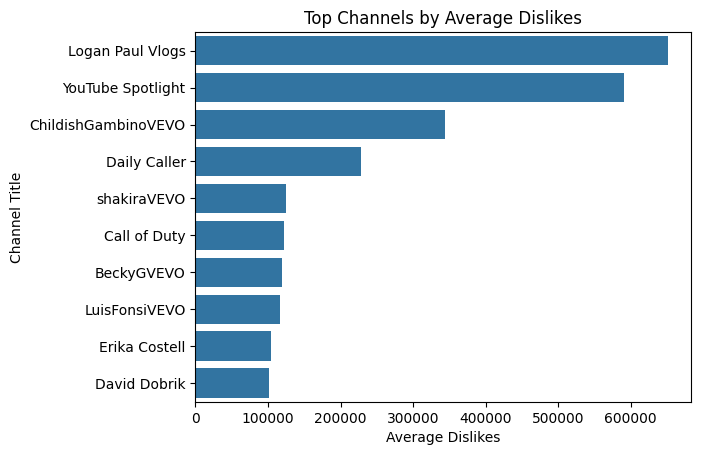

In [42]:
sns.barplot(data=dislikes_by_channel, orient='h')
plt.title(label='Top Channels by Average Dislikes')
plt.xlabel(xlabel='Average Dislikes')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Comments**

In [43]:
comments_by_channel = latest_trending_date.groupby(by='channel_title')['comment_count'].mean().sort_values(ascending=False).head(n=10)

channel_title
Logan Paul Vlogs      658,084.25
ChildishGambinoVEVO   517,232.00
ibighit               377,834.00
David Dobrik          320,194.00
YouTube Spotlight     302,081.33
The ACE Family        193,355.00
Collins Key           157,166.00
TheAngryGrandpaShow   137,276.50
LuisFonsiVEVO         134,224.00
jypentertainment      104,597.00
Name: comment_count, dtype: float64

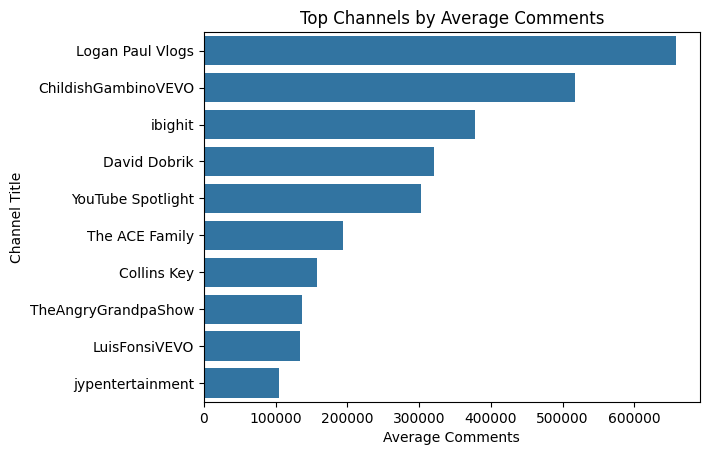

In [44]:
sns.barplot(data=comments_by_channel, orient='h')
plt.title(label='Top Channels by Average Comments')
plt.xlabel(xlabel='Average Comments')
plt.ylabel(ylabel='Channel Title')
plt.show()

### **Question 11: Which channels have the best average ratio of likes to dislikes?**

In [45]:
likes_to_dislikes = latest_trending_date.copy()
likes_to_dislikes['likes_to_dislikes'] = likes_to_dislikes['likes'] / (likes_to_dislikes['dislikes'] + 1) # Avoid division by zero
likes_to_dislikes = likes_to_dislikes.groupby(by='channel_title')['likes_to_dislikes'].mean().sort_values(ascending=False).head(n=10)

channel_title
Smyang Piano              1,195.00
Amber Liu                   602.80
KickThePj                   565.26
Duan Mackenzie              498.07
TheVampsVEVO                371.04
Conan Gray                  369.04
Kingsley                    362.43
DanAndPhilGAMES             317.17
ShibSibs                    311.60
Alex French Guy Cooking     294.30
Name: likes_to_dislikes, dtype: float64

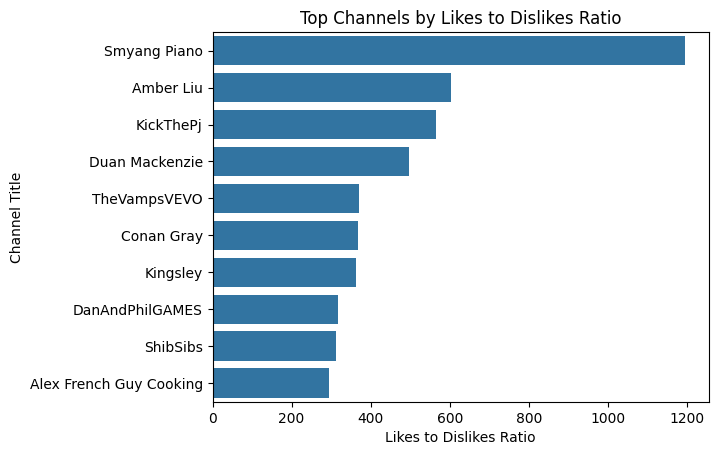

In [46]:
sns.barplot(data=likes_to_dislikes, orient='h')
plt.title(label='Top Channels by Likes to Dislikes Ratio')
plt.xlabel(xlabel='Likes to Dislikes Ratio')
plt.ylabel(ylabel='Channel Title')
plt.show()

## **Seasonality**

### **Question 12: Which months or quarters see the highest number of published videos?**

In [50]:
videos_by_publish_month = us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique()

publish_time
1     1269
2      995
3      688
4      537
5      541
6      147
7        4
8        6
9       10
10      17
11     972
12    1167
Name: video_id, dtype: int64

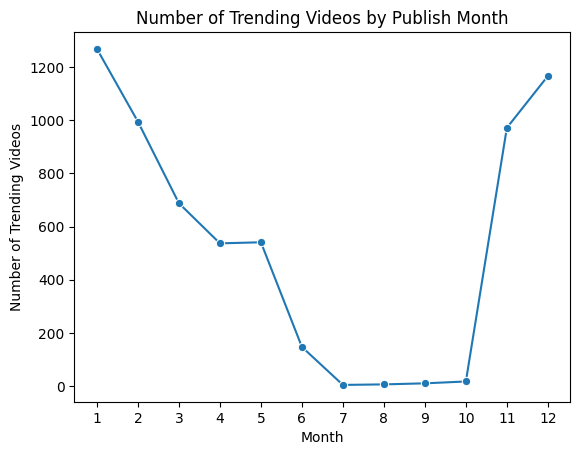

In [54]:
sns.lineplot(data=videos_by_publish_month, marker='o')
plt.title(label='Number of Trending Videos by Publish Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [52]:
videos_by_publish_quarter = us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique()

publish_time
1    2952
2    1224
3      20
4    2156
Name: video_id, dtype: int64

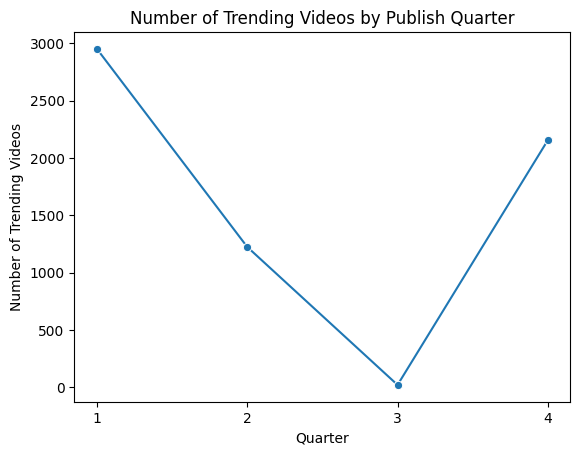

In [53]:
sns.lineplot(data=videos_by_publish_quarter, marker='o')
plt.title(label='Number of Trending Videos by Publish Quarter')
plt.xlabel(xlabel='Quarter')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 5), labels=range(1, 5))
plt.show()

### **Question 13: Which months see the highest number of trending videos?**

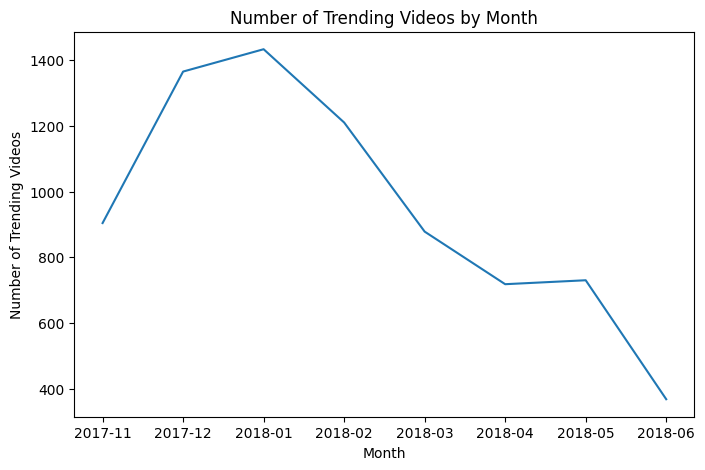

In [56]:
trending_by_time = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_time['trending_month'] = trending_by_time['trending_date'].astype(str).str[:7]
trending_by_time.drop(columns='trending_date', inplace=True)

plt.figure(figsize=(8, 5))
sns.lineplot(data=trending_by_time.groupby(by='trending_month')['video_id'].nunique())
plt.title(label='Number of Trending Videos by Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.show()

## **Title**

### **Question 14: How many videos have titles that are capitalized or non-capitalized?**

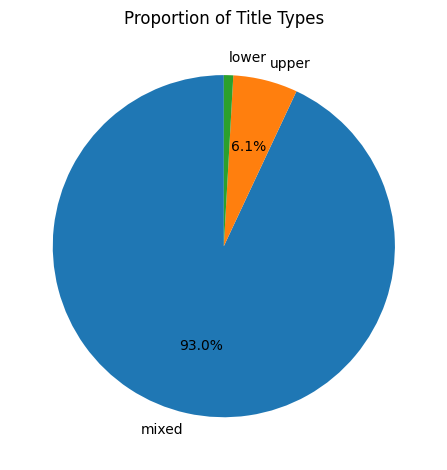

In [289]:
title_types = us_videos.loc[:, ['video_id', 'title']]
title_types['type'] = np.where(
    title_types['title'] == title_types['title'].str.upper(), 'upper', np.where(
        title_types['title'] == title_types['title'].str.lower(), 'lower', 'mixed'
    )
)

def autopct_func_1(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

title_types['type'].value_counts().plot.pie(startangle=90, autopct=autopct_func_1)
plt.title(label='Proportion of Title Types')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

### **Question 15: What is the length of videos' title?**

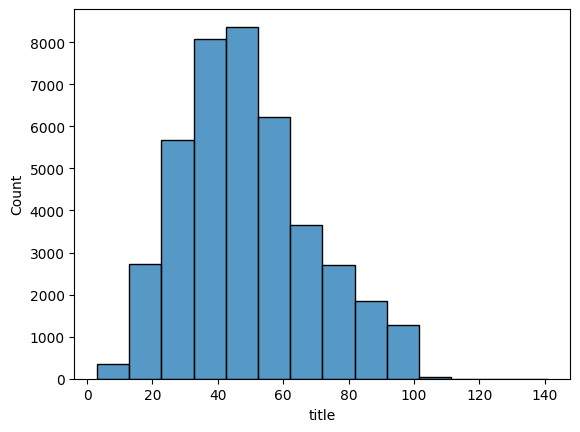

In [23]:
sns.histplot(data=us_videos['title'].str.len(), binwidth=10)
plt.show()

### **Question 16: How many videos share the same title?**

In [259]:
us_videos.groupby(by='title')['video_id'].nunique().sort_values(ascending=False)

title
DORITOS BLAZE vs. MTN DEW ICE | Super Bowl Commercial with Peter Dinklage and Morgan Freeman    2
Justice League - Movie Review                                                                   2
Maroon 5 - Wait                                                                                 2
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                    2
Missouri Star Quilt Company Live Stream                                                         2
                                                                                               ..
íë§ì¿ í¹â¥ ë¹ê¸ë¹ê¸ íì¤ë¦¬ì ¤ë¦¬ ë§ë¤ê¸°! - Ari Kitchen(ìë¦¬í¤ì¹)             1
ð april favs ð (music, clothes, life)                                                     1
ð«ë¬ì½¤ ìì¬ë¦~ ë¦¬ì¼ ì´ì½ë¦¿ ì°ì  ë§ë¤ê¸° Real Chocolate Milk | íì¸            1
ð How to make Pumpkin Pie Mistakes                                                           1
#23 Feed The H

In [262]:
temp = us_videos.groupby(by='title')['video_id'].nunique().sort_values(ascending=False)
temp[temp == 2]

title
DORITOS BLAZE vs. MTN DEW ICE | Super Bowl Commercial with Peter Dinklage and Morgan Freeman    2
Justice League - Movie Review                                                                   2
Maroon 5 - Wait                                                                                 2
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                    2
Missouri Star Quilt Company Live Stream                                                         2
NBA Bloopers - The Starters                                                                     2
Selena Gomez, Marshmello - Wolves                                                               2
Sia - Ho Ho Ho                                                                                  2
Name: video_id, dtype: int64

## **Categories**

### **Question 17: What categories are the most common?**

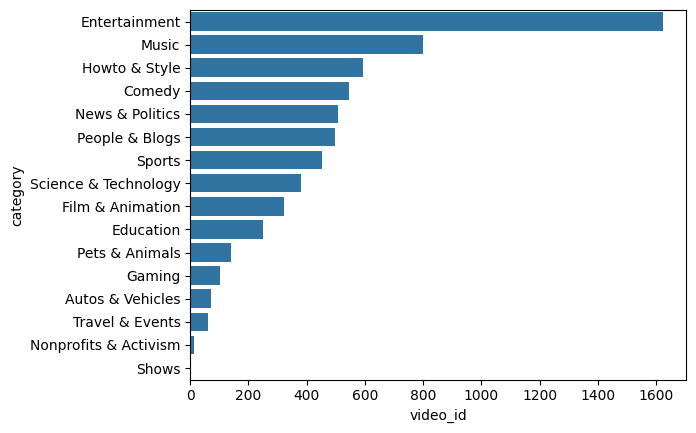

In [24]:
sns.barplot(data=us_videos.groupby(by='category')['video_id'].nunique().sort_values(ascending=False), orient='h')
plt.show()

### **Question 18: What categories receive the most average views, likes, dislikes, and comments?**

#### **Views**

In [292]:
us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['video_id'].nunique().sort_values(ascending=False)

category
Entertainment            1621
Music                     801
Howto & Style             594
Comedy                    544
News & Politics           504
People & Blogs            495
Sports                    449
Science & Technology      381
Film & Animation          320
Education                 251
Pets & Animals            140
Gaming                    103
Autos & Vehicles           71
Travel & Events            59
Nonprofits & Activism      14
Shows                       4
Name: video_id, dtype: int64

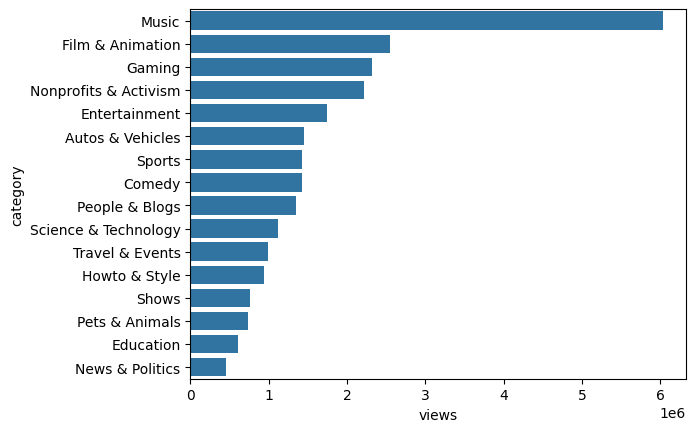

In [295]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['views'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Likes**

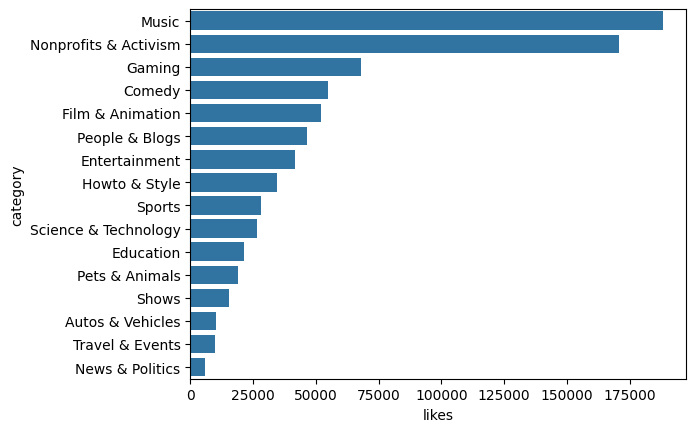

In [300]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['likes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Dislikes**

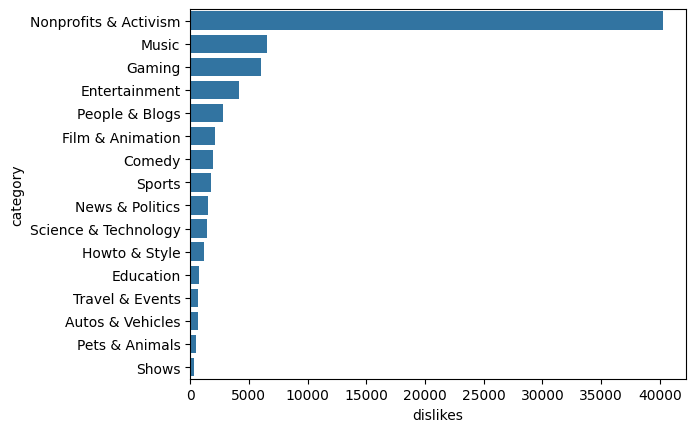

In [303]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['dislikes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Comments**

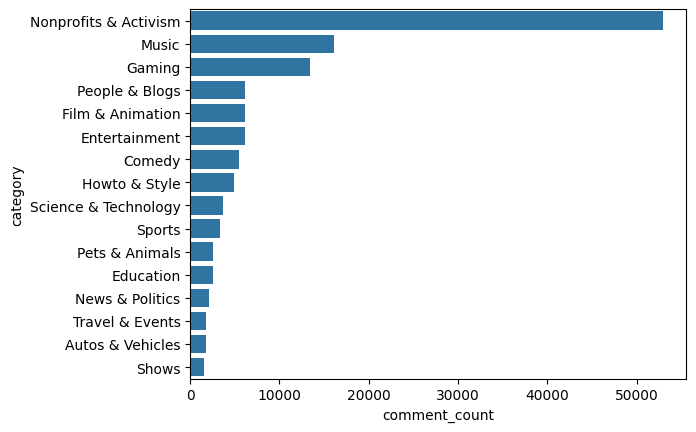

In [304]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['comment_count'].mean().sort_values(ascending=False), orient='h')
plt.show()

## **Tags**

### **Question 19: What tags are the most common?**

In [348]:
tags_dict = Counter([tag.replace('"', '') for tags in us_videos['tags'].str.split('|') for tag in tags if tag != '[none]'])
common_tags = tags_dict.most_common(10)

[('funny', 3597),
 ('comedy', 2927),
 ('how to', 1602),
 ('music', 1298),
 ('Pop', 1278),
 ('2018', 1270),
 ('humor', 1184),
 ('food', 1159),
 ('science', 1111),
 ('review', 1004)]

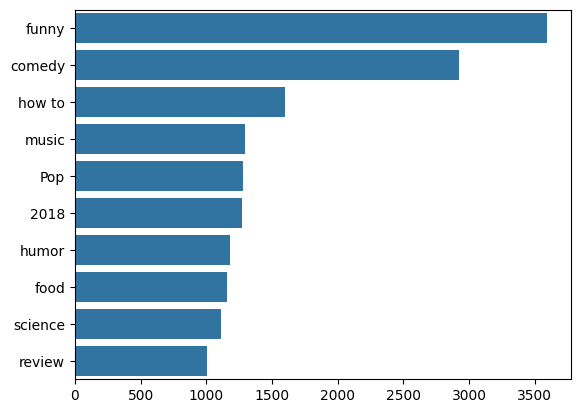

In [349]:
sns.barplot(x=[tag[1] for tag in common_tags], y=[tag[0] for tag in common_tags], orient='h')
plt.show()

### **Question 20: What tags receive the most average views, likes, dislikes, and comments?**

#### **Views**

In [373]:
tags_view = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_view[tag].append(us_videos.loc[i, 'views'])

for tag in tags_view.keys():
    tags_view[tag] = np.mean(a=tags_view[tag])

tags_view = sorted(tags_view.items(), key=lambda x: x[1], reverse=True)
top_tags_view = tags_view[:10]
bot_tags_view = tags_view[::-1][:10]

In [374]:
top_tags_view

[('This Is America', np.float64(150339550.6)),
 ('mcDJ Recording/RCA Records', np.float64(150339550.6)),
 ('Rewind 2017', np.float64(97600130.0)),
 ('#YouTubeRewind', np.float64(97600130.0)),
 ('Rewind 2016', np.float64(97600130.0)),
 ('HolaSoyGerman', np.float64(97600130.0)),
 ('Lilly Singh', np.float64(97600130.0)),
 ('Markiplier', np.float64(97600130.0)),
 ('Swoozie', np.float64(97600130.0)),
 ('Rhett Link', np.float64(97600130.0))]

In [375]:
bot_tags_view

[('governor matt bevin', np.float64(554.0)),
 ('fatality', np.float64(554.0)),
 ('marshall county high school', np.float64(554.0)),
 ('u.s. news', np.float64(554.0)),
 ('kentucky', np.float64(554.0)),
 ('NIKE', np.float64(695.5)),
 ('Autzen Stadium', np.float64(695.5)),
 ('Hayward Field', np.float64(695.5)),
 ('Track & Field', np.float64(695.5)),
 ('Tracktown USA', np.float64(695.5))]

#### **Likes**

In [376]:
tags_like = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_like[tag].append(us_videos.loc[i, 'likes'])

for tag in tags_like.keys():
    tags_like[tag] = np.mean(a=tags_like[tag])

tags_like = sorted(tags_like.items(), key=lambda x: x[1], reverse=True)
top_tags_like = tags_like[:10]
bot_tags_like = tags_like[::-1][:10]

In [377]:
top_tags_like

[('FAKE_LOVE', np.float64(5227306.076923077)),
 ('This Is America', np.float64(3868032.72)),
 ('mcDJ Recording/RCA Records', np.float64(3868032.72)),
 ('FAKE LOVE', np.float64(3483758.5)),
 ('fake love', np.float64(3323154.0434782607)),
 ('BIGHIT', np.float64(2490589.0125)),
 ('Rewind 2017', np.float64(2472671.5)),
 ('#YouTubeRewind', np.float64(2472671.5)),
 ('Rewind 2016', np.float64(2472671.5)),
 ('HolaSoyGerman', np.float64(2472671.5))]

In [378]:
bot_tags_like

[('CONCEALER KIT', np.float64(0.0)),
 ('KKW BEAUTY', np.float64(0.0)),
 ('Mario Dedivanovic', np.float64(0.0)),
 ('after movie', np.float64(0.0)),
 ('relive', np.float64(0.0)),
 ('umf', np.float64(0.0)),
 ('ultra music festival', np.float64(0.0)),
 ('raft', np.float64(0.0)),
 ('ITF', np.float64(0.0)),
 ('Indonesian Through Flow', np.float64(0.0))]

#### **Dislikes**

In [379]:
tags_dislike = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_dislike[tag].append(us_videos.loc[i, 'dislikes'])

for tag in tags_dislike.keys():
    tags_dislike[tag] = np.mean(a=tags_dislike[tag])

tags_dislike = sorted(tags_dislike.items(), key=lambda x: x[1], reverse=True)
top_tags_dislike = tags_dislike[:10]
bot_tags_dislike = tags_dislike[::-1][:10]

In [380]:
top_tags_dislike

[('logan paul apology', np.float64(1313219.857142857)),
 ('suicide forest', np.float64(1313219.857142857)),
 ('japanese suicide forest', np.float64(1313219.857142857)),
 ('suicide apology', np.float64(1313219.857142857)),
 ('Rewind 2017', np.float64(1263894.125)),
 ('#YouTubeRewind', np.float64(1263894.125)),
 ('Rewind 2016', np.float64(1263894.125)),
 ('HolaSoyGerman', np.float64(1263894.125)),
 ('Lilly Singh', np.float64(1263894.125)),
 ('Markiplier', np.float64(1263894.125))]

In [381]:
bot_tags_dislike

[('CONCEALER KIT', np.float64(0.0)),
 ('KKW BEAUTY', np.float64(0.0)),
 ('Mario Dedivanovic', np.float64(0.0)),
 ('after movie', np.float64(0.0)),
 ('relive', np.float64(0.0)),
 ('umf', np.float64(0.0)),
 ('ultra music festival', np.float64(0.0)),
 ('raft', np.float64(0.0)),
 ('ITF', np.float64(0.0)),
 ('Indonesian Through Flow', np.float64(0.0))]

#### **Comments**

In [383]:
tags_comment = {tag: [] for tag in tags_dict.keys()}

for i in range(us_videos.shape[0]):
    tags = us_videos.loc[i, 'tags'].replace('"', '').split('|')
    
    if tags[0] == '[none]':
        continue

    for tag in tags:
        tags_comment[tag].append(us_videos.loc[i, 'comment_count'])

for tag in tags_comment.keys():
    tags_comment[tag] = np.mean(a=tags_comment[tag])

tags_comment = sorted(tags_comment.items(), key=lambda x: x[1], reverse=True)
top_tags_comment = tags_comment[:10]
bot_tags_comment = tags_comment[::-1][:10]

In [384]:
top_tags_comment

[('logan paul apology', np.float64(1170006.4285714286)),
 ('suicide forest', np.float64(1170006.4285714286)),
 ('japanese suicide forest', np.float64(1170006.4285714286)),
 ('suicide apology', np.float64(1170006.4285714286)),
 ('FAKE_LOVE', np.float64(1144327.3846153845)),
 ('Rewind 2017', np.float64(737316.125)),
 ('#YouTubeRewind', np.float64(737316.125)),
 ('Rewind 2016', np.float64(737316.125)),
 ('HolaSoyGerman', np.float64(737316.125)),
 ('Lilly Singh', np.float64(737316.125))]

In [385]:
bot_tags_comment

[('apple hyukoh', np.float64(0.0)),
 ('apple emojis', np.float64(0.0)),
 ('iphone x emojis', np.float64(0.0)),
 ('iphone emojis', np.float64(0.0)),
 ('iphone citizen kane', np.float64(0.0)),
 ('iphone hyukoh', np.float64(0.0)),
 ('chicken animoji', np.float64(0.0)),
 ('dragon animoji', np.float64(0.0)),
 ('bear animoji', np.float64(0.0)),
 ('citizen kane animoji', np.float64(0.0))]

## **Key factors for popularity**

### **Question 21: Which are the key factors that contribute to popularity?**